In [5]:
import numpy as np
from matplotlib import pyplot as plt
import qcodes
from qcodes.instrument_drivers.yokogawa import GS200 as yokogawa
from qcodes.instrument_drivers.Keysight import Keysight_34465A as DMM
from qcodes.instrument_drivers.stanford_research import SR860 as Lockin
from qcodes.instrument_drivers.rohde_schwarz import SGS100A  as RF
import time
import datetime
import sys
from qcodes.instrument.parameter import ManualParameter
from qcodes.sweep import sweep
from qcodes.sweep.sweep import time_trace
import h5py

from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path
%matplotlib notebook

In [2]:
yoko = yokogawa.GS200('yoko', 'USB0::0x0B21::0x0039::91TC01026::INSTR')
key1 = DMM.Keysight_34465A('key1', 'TCPIP0::169.254.162.148')
key2 = DMM.Keysight_34465A('key2', 'TCPIP0::169.254.171.210')
key3 = DMM.Keysight_34465A('key3', 'TCPIP0::169.254.4.61')
lockin = Lockin.SR860('lockin','GPIB0::4::INSTR' )
rf = RF.RohdeSchwarz_SGS100A('rf', 'TCPIP0::169.254.251.130')

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:568: FutureWarning: ask is deprecated and will be removed in 1.10, use query instead.
  '1.10, use query instead.', FutureWarning)


Connected to: YOKOGAWA GS210 (serial:91TC01026, firmware:2.02) in 0.14s
Connected to: Keysight Technologies 34465A (serial:MY57505052, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.42s
Connected to: Keysight Technologies 34465A (serial:MY57505146, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.37s
Connected to: Keysight Technologies 34465A (serial:MY57505157, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.46s
Connected to: Stanford_Research_Systems SR860 (serial:003223, firmware:V1.47) in 0.09s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/110529, firmware:3.1.19.15-3.50.124.67) in 0.02s


In [35]:
def yokoramp(Vset):
    Vstart = yoko.voltage()
    Vstep = 0.001 #[V]
    voltage = np.linspace(Vstart,Vset,int(abs(Vstart-Vset)/Vstep))
    delay = 0.05 #[s]
    for i in range(len(voltage)):
        yoko.voltage(voltage[i])
        time.sleep(delay)

In [ ]:
def openfile(basename):
    path = r"D:\Data"
    date = now.strftime("%Y-%m-%d")
    

In [43]:
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d"))

2018-03-29


C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:568: FutureWarning: ask is deprecated and will be removed in 1.10, use query instead.
  '1.10, use query instead.', FutureWarning)


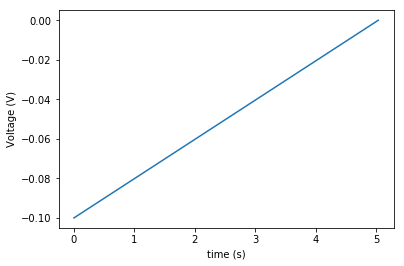

In [38]:
Vtarget = 0

start = time.time()
Vstart = yoko.voltage()
yokoramp(Vtarget)
Vend = yoko.voltage()
end = time.time()

timing = np.array([(start - start), (end - start)])
volts = np.array([Vstart, Vend])
plt.plot(timing,volts)
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
plt.show()

## Test a mock measurement

In [ ]:
DIR = r"C:\Users\jowat\data\2018-03-23"
fname = Device + '_' + str(Diameter) + 'um_' + str(Column) + '_' + str(Vrate*1000) + 'mVps_' + str(abs(Vend-Vstart)) + 'V_' + str(Vstep*1000) +'mVstep_Navg' + str(Navg)
fullpath = os.path.join(DIR, fname+'upsweep.txt')
file = open(fullpath,'w')
file.write('V (Volts) \t I (A) \n')

## Reproduce Sohail's example with real time plot of dummy instrument

<IPython.core.display.Javascript object>


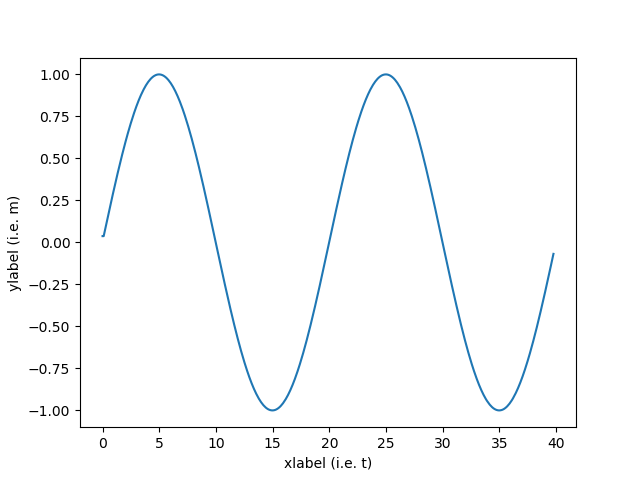

Starting experimental run with id: 19


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.03727638275014353, top=0.03727638275014353
  'bottom=%s, top=%s') % (bottom, top))


Completed measurement. Database path: cool_experiment/my_sample/18


In [72]:
t0 = None
m = ManualParameter("m", unit="A")
m.get = lambda: np.sin((time.time() - t0) * 2 * np.pi / 20)

def start_time():
    global t0
    t0 = time.time()

setup = [(start_time, tuple())]
cleanup = [(lambda: None, tuple())]

result = do_experiment(
    "cool_experiment/my_sample",
    setup,
    time_trace(m, 0.1, 40.0),
    cleanup,
    return_format=["data_set_path"], 
    live_plot_axes=[{"xlabel (i.e. t)": 0, "ylabel (i.e. m)": 1}]
)

<IPython.core.display.Javascript object>


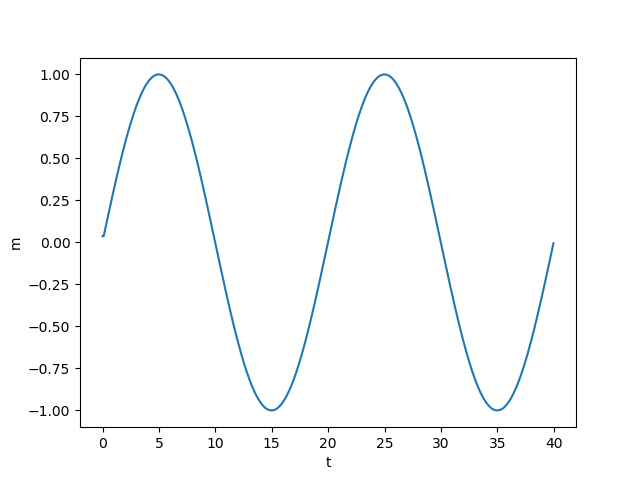

Text(0,0.5,'m')

In [73]:
#Now check that we can get the data back out of the dataset database
data_set_path = result[0]
data = get_results_from_db_path(data_set_path, return_as_dict=True)
plt.figure(4)
plt.plot(data["time"].flatten(), data["m"].flatten())
plt.xlabel('t')
plt.ylabel('m')

In [76]:
data

{'m': array([[ 0.03727638],
        [ 0.03727638],
        [ 0.06869232],
        [ 0.10019551],
        [ 0.13143199],
        [ 0.16252748],
        [ 0.19349072],
        [ 0.22425259],
        [ 0.25479388],
        [ 0.28508139],
        [ 0.31507992],
        [ 0.34478372],
        [ 0.38245665],
        [ 0.41133124],
        [ 0.4397951 ],
        [ 0.46781806],
        [ 0.49537808],
        [ 0.52244862],
        [ 0.54900915],
        [ 0.57502579],
        [ 0.60046681],
        [ 0.62531984],
        [ 0.64955609],
        [ 0.68537612],
        [ 0.70794014],
        [ 0.7297985 ],
        [ 0.75094032],
        [ 0.77133822],
        [ 0.79097272],
        [ 0.8098209 ],
        [ 0.82786812],
        [ 0.84510605],
        [ 0.86150243],
        [ 0.87704582],
        [ 0.8976297 ],
        [ 0.91104775],
        [ 0.92363128],
        [ 0.93528571],
        [ 0.94595357],
        [ 0.95568558],
        [ 0.96447182],
        [ 0.97230205],
        [ 0.9791728 ],
      

## Now try implementing the real time plotting with actual instruments

In [52]:
from pysweep import measurement
from pysweep import Measurement #,sweep
from pysweep import data_plot
from collections import OrderedDict
from qcodes.sweep import sweep, szip

In [17]:
station = qcodes.Station(key2, yoko)
Measurement.set_station(station)



C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:568: FutureWarning: ask is deprecated and will be removed in 1.10, use query instead.
  '1.10, use query instead.', FutureWarning)
Snapshot: Could not update parameter:current_range
Snapshot: Could not update parameter:current


In [18]:
def setup(station, namespace): 
    return {}

def cleanup(station, namespace): 
    return {}

   
def dc_measurement(station, namespace):
    
    #if hasattr(namespace, 't0'):
        #print('time since last point: {:.3f}'.format((time.time()-namespace.t0)*1e3))
    namespace.t0 = time.time()
    
    S1_gain = 1 # for now 
    NW_gain = 1 # Gain of current amp in V/A
    V_range = 1 #Gain factor of voltage source module in V/V
    
    NW_res = 26400 + NW_gain*1e-4+100
    
    t0 = time.time()
    k2 = station.key2.volt()
    t1 = time.time() - t0
    #print("voltage readout took {:.3f} ms".format(t1 * 1e3))
    
    k2_scaled = k2/NW_gain
    #k2 = station.key2.volt()
    #k2_scaled = k2/S1_gain
   
    t0 = time.time()
    #lockin1_x = station.sr1.X()
    #lockin1_p = station.sr1.P()
    t1 = time.time() - t0
    #print("lock-in readout took {:.3f} ms".format(t1 * 1e3))
    
    #if lockin1_x == 0:
    #    processed1 = 1e99
    #else:
    #    processed1 = station.sr1.amplitude()*V_range*0.01 / (lockin1_x/NW_gain)-NW_res
    
    return OrderedDict({
        #"Current": {"unit": "A", "value": k1_scaled}, 
        "k2": {"unit": "V", "value": k2},
        #"k2 scaled": {"unit": "V", "value": k2_scaled}, 
        #"k2": {"unit": "V", "value": k2},
        #"lockin1_x": {"unit": "V", "value": lockin1_x}, 
        #"lockin1_p": {"unit": "deg", "value": lockin1_p}, 
        #"processed1": {"unit": "Ohm", "value": processed1}, 
        #"conductance": {"unit": "e^2/h", "value": 12906/processed1}
    })

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:568: FutureWarning: ask is deprecated and will be removed in 1.10, use query instead.
  '1.10, use query instead.', FutureWarning)


<IPython.core.display.Javascript object>


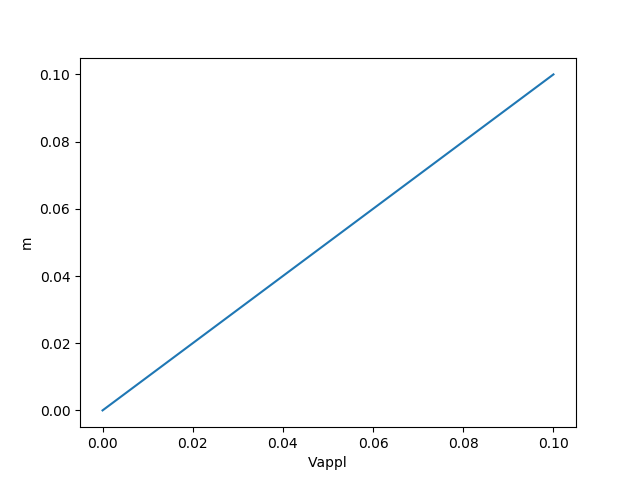

Starting experimental run with id: 30
Completed measurement. Database path: cool_experiment/my_sample/29


In [137]:
m = key2.volt
x = yoko.voltage()


setup = [(lambda: None, tuple())]
cleanup = [(lambda: None, tuple())]

def yokoramp(Vset):
    Vstart = yoko.voltage()
    Vstep = 0.001 #[V]
    voltage = np.linspace(Vstart,Vset,int(abs(Vstart-Vset)/Vstep))
    delay = 0.05 #[s]
    for i in range(len(voltage)):
        yoko.voltage(voltage[i])
        time.sleep(delay)
'''
def time_trace(measurement_object, interval_time, total_time):
    """
    Make time trace sweep object to monitor the return value of the measurement
    object over a certain time period.
    """
    tt_sweep = TimeTrace(interval_time, total_time)
    return szip(measurement_object, tt_sweep)
'''        
def john_measurement(measurement_object, step, endpoint):
    """
    Make time trace sweep object to monitor the return value of the measurement
    object over a certain time period.
    """
    start = yoko.voltage()
    v_sweep = []
    for i in range(int(abs(endpoint - start)/step)):
        v_sweep.append(start + step)
        start = start + step
    return szip(measurement_object, v_sweep)

def test_measurement():
    k2 = key2.volt()
    time.sleep(0.1)
    return OrderedDict({
        "k2": {"unit": "V", "value": k2},        
    })

def measure_DC():
    k2 = key2.volt()
    return k2


result = do_experiment(
    "cool_experiment/my_sample",
    setup,
    #time_trace(m, 0.1, 40.0),
    #sweep(yoko.voltage, [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])(m),
    sweep(yoko.voltage, np.linspace(0, 0.1, 11).tolist())(m),
    #sweep(yoko.voltage, np.linspace(0, 0.1, 11).tolist())(test_measurement),
    #sweep_object,
    #john_measurement(key2.volt, 0.01, 0.1),
    #sweep(x, [0, 0.1, 0.2]),
    cleanup,
    return_format=["data_set_path"], 
    live_plot_axes=[{"Vappl": 0, "m": 1}]
)

<IPython.core.display.Javascript object>


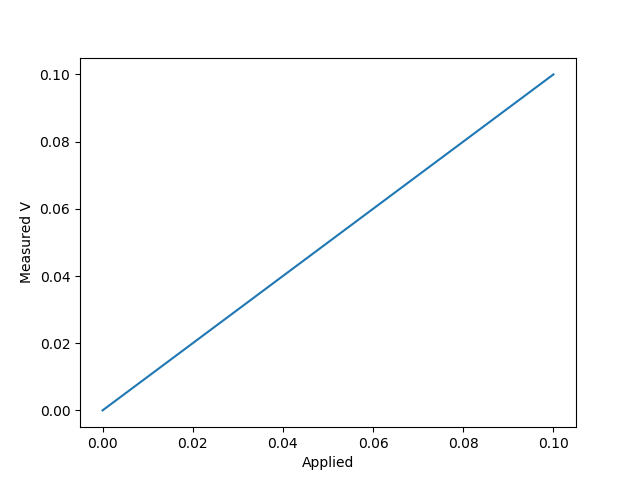

Text(0,0.5,'Measured V')

In [131]:
#Now check that we can get the data back out of the dataset database
data_set_path = result[0]
data = get_results_from_db_path(data_set_path, return_as_dict=True)
plt.figure(6)
plt.plot(data["yoko_voltage"].flatten(), data["key2_volt"].flatten())
plt.xlabel('Applied')
plt.ylabel('Measured V')